# Natural Language Processing with PyTorch

## Chapter 2 A Quick Tour of Traditional NLP

### Corpora, Tokens, and Types

Corpus: text dataset with metadata 

Tokens: grouped contiguous units of characters 

Instance: some text along with the corresponding metadata 

Tokenization: process of fractionalizing corpus into instances 

    

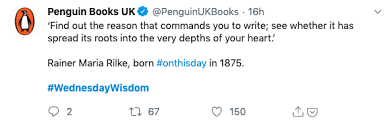

In the above tweet, during the tokenization process the @'s and #'s should remain in place as well as any emojis should be preserved. Many packages tokenize text for us be but we will specifically be using NLTK and spaCy.

Must install spaCy packages seperately. Install with these commands:

    pip install -U pip setuptools wheel
    pip install -U spacy
    python -m spacy download en_core_web_trf

or if you use conda:

    conda install -c conda-forge spacy
    python -m spacy download en_core_web_trf
    
Install NLTK with pip:

    pip install --user -U nltk
    
or with conda:

    conda install -c anaconda nltk

In [19]:
import spacy

nlp = spacy.load('en_core_web_trf')
tweet = "Find out the reason that commands you to write; see whether it has spread its roots into the very depths of your heart."
cleanedTweet = [str(token) for token in nlp(tweet.lower())]
print(cleanedTweet)

['find', 'out', 'the', 'reason', 'that', 'commands', 'you', 'to', 'write', ';', 'see', 'whether', 'it', 'has', 'spread', 'its', 'roots', 'into', 'the', 'very', 'depths', 'of', 'your', 'heart', '.']


In [20]:
from nltk.tokenize import TweetTokenizer

fullTweet = "'Find out the reason that commands you to write; see whether it has spread its roots into the very depths of your heart.' Rainer Maria Rilke, born #onthisday in 1875. #WednesdayWisdom"

tokenizer = TweetTokenizer()
print(tokenizer.tokenize(fullTweet.lower()))

["'", 'find', 'out', 'the', 'reason', 'that', 'commands', 'you', 'to', 'write', ';', 'see', 'whether', 'it', 'has', 'spread', 'its', 'roots', 'into', 'the', 'very', 'depths', 'of', 'your', 'heart', '.', "'", 'rainer', 'maria', 'rilke', ',', 'born', '#onthisday', 'in', '1875', '.', '#wednesdaywisdom']


Types: Unique tokens in a corpus
Vocabulary: Set of all types in a corpus
Stopwords: Articles and prepositions which serve a grammatical purpose

### Unigrams, Bigrams, Trigrams, ..., N-Grams

N-Grams: fixed-length consecutive token sequences that occur in the text

In [30]:
def n_grams(text, n):
    '''
    takes tokens or text, returns a list of ngrams
    '''
    return [text[i:i+n] for i in range(len(text)-n+1)]


print("Bigram:\n",n_grams(cleanedTweet, 2)) # bigram
print("\nTrigram:\n",n_grams(cleanedTweet, 3)) # trigram


Bigram:
 [['find', 'out'], ['out', 'the'], ['the', 'reason'], ['reason', 'that'], ['that', 'commands'], ['commands', 'you'], ['you', 'to'], ['to', 'write'], ['write', ';'], [';', 'see'], ['see', 'whether'], ['whether', 'it'], ['it', 'has'], ['has', 'spread'], ['spread', 'its'], ['its', 'roots'], ['roots', 'into'], ['into', 'the'], ['the', 'very'], ['very', 'depths'], ['depths', 'of'], ['of', 'your'], ['your', 'heart'], ['heart', '.']]

Trigram:
 [['find', 'out', 'the'], ['out', 'the', 'reason'], ['the', 'reason', 'that'], ['reason', 'that', 'commands'], ['that', 'commands', 'you'], ['commands', 'you', 'to'], ['you', 'to', 'write'], ['to', 'write', ';'], ['write', ';', 'see'], [';', 'see', 'whether'], ['see', 'whether', 'it'], ['whether', 'it', 'has'], ['it', 'has', 'spread'], ['has', 'spread', 'its'], ['spread', 'its', 'roots'], ['its', 'roots', 'into'], ['roots', 'into', 'the'], ['into', 'the', 'very'], ['the', 'very', 'depths'], ['very', 'depths', 'of'], ['depths', 'of', 'your'], ['o

Sometimes character n-grams can be useful as well as they can help find patterns in suffixes and prefixes.

### Lemmas and Stems

Lemmas: root form of a word
Lemmatization: reduction of tokens to their lemma

In [37]:
doc = nlp(u"Adam was seen bravely running to the scene")
print(doc)
for token in doc:
    print('{} --> {}'.format(token, token.lemma_))

Adam was seen bravely running to the scene
Adam --> Adam
was --> be
seen --> see
bravely --> bravely
running --> run
to --> to
the --> the
scene --> scene


spaCy uses a predefined dictionary (WordNet) for lemmatization.

Stemming: Use of defined rules to strip endings from words to create stems

### Categorizing Sentences and Documents

Commonly done in the cases of sentiment analysis for reviews, spam filtering, language identification, topic assignment, and email triaging.

### Categorizing Words: POS Tagging

Labeling each word and symbol as what their part-of-speech (POS) is.

In [38]:
print(doc)
for token in doc:
    print('{} - {}'.format(token, token.pos_))

Adam was seen bravely running to the scene
Adam - PROPN
was - AUX
seen - VERB
bravely - ADV
running - VERB
to - ADP
the - DET
scene - NOUN


### Categorizing Spans: Chunking and named Entity Recognition

Using our example sentence "Adam was seen bravely running into the scene" we can label spans of text. 

    [NP Adam] [VP was seen] [VP bravely running] to [NP the scene]
    

In [41]:
print(doc)
for chunk in doc.noun_chunks:
    print ('{} - {}'.format(chunk, chunk.label_))

Adam was seen bravely running to the scene
Adam - NP
the scene - NP


### Structure of Sentence

Shallow Parsing: indentifies phrasal units
Parsing: Identifies relationships within phrasal units

Parse trees show the heirarchy of grammatical units within a sentence.
Below is a Constituent Parse:

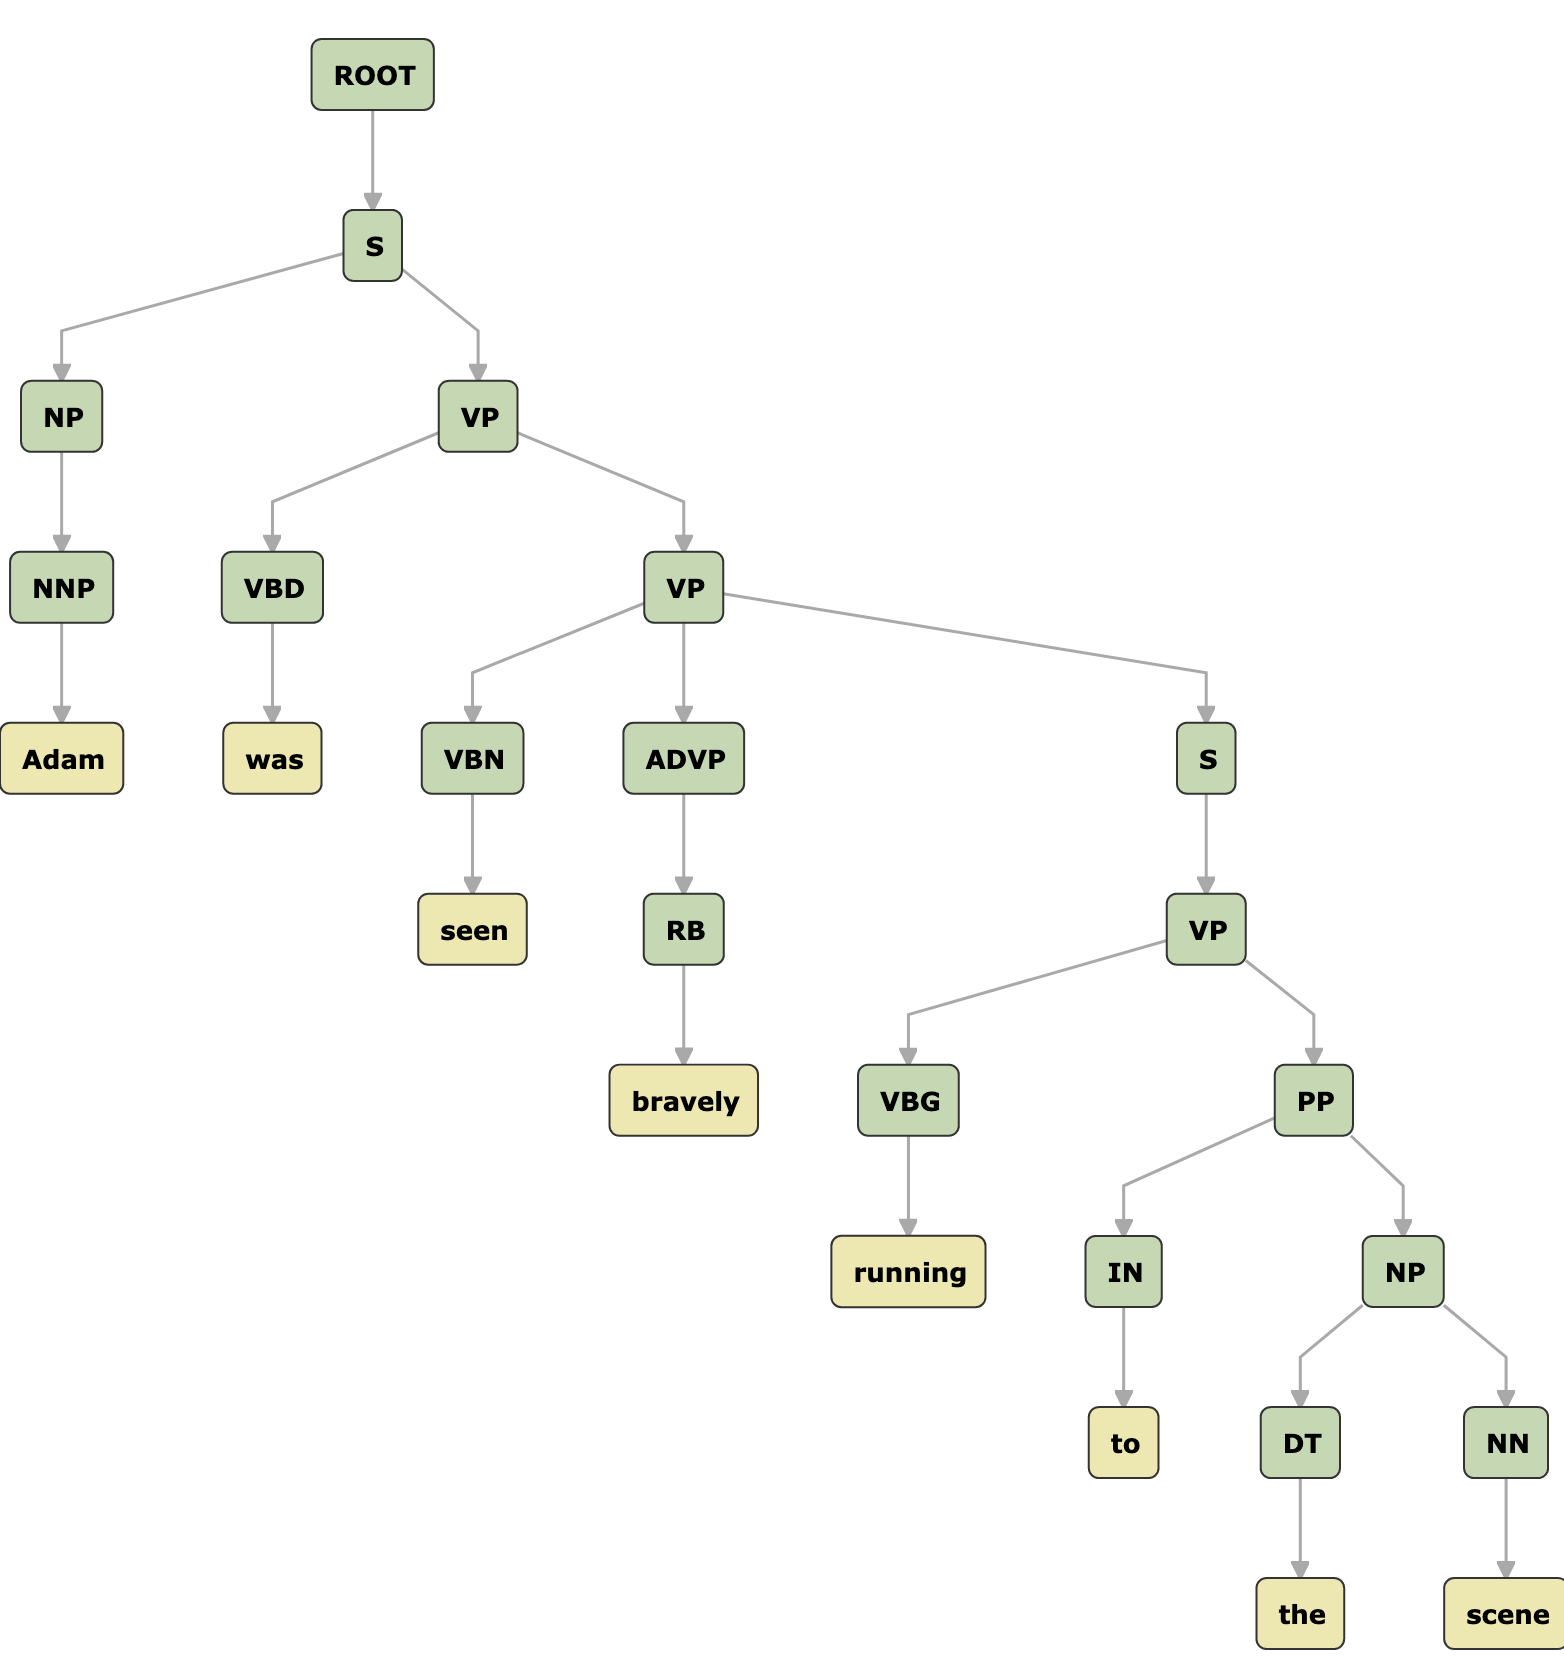

In identifying relationships, dependency parsing is also very useful and clear.

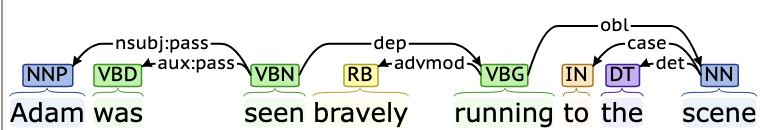

<sub>Graphs made using corenlp.run</sub>

### Word Senses and Semantics

Senses: Different meanings of a word

WordNet, which is used by spaCy, attempts to catalog every sense of every word in the English dictionary. For example, even a simple word like 'zero' produces a multitude of results:


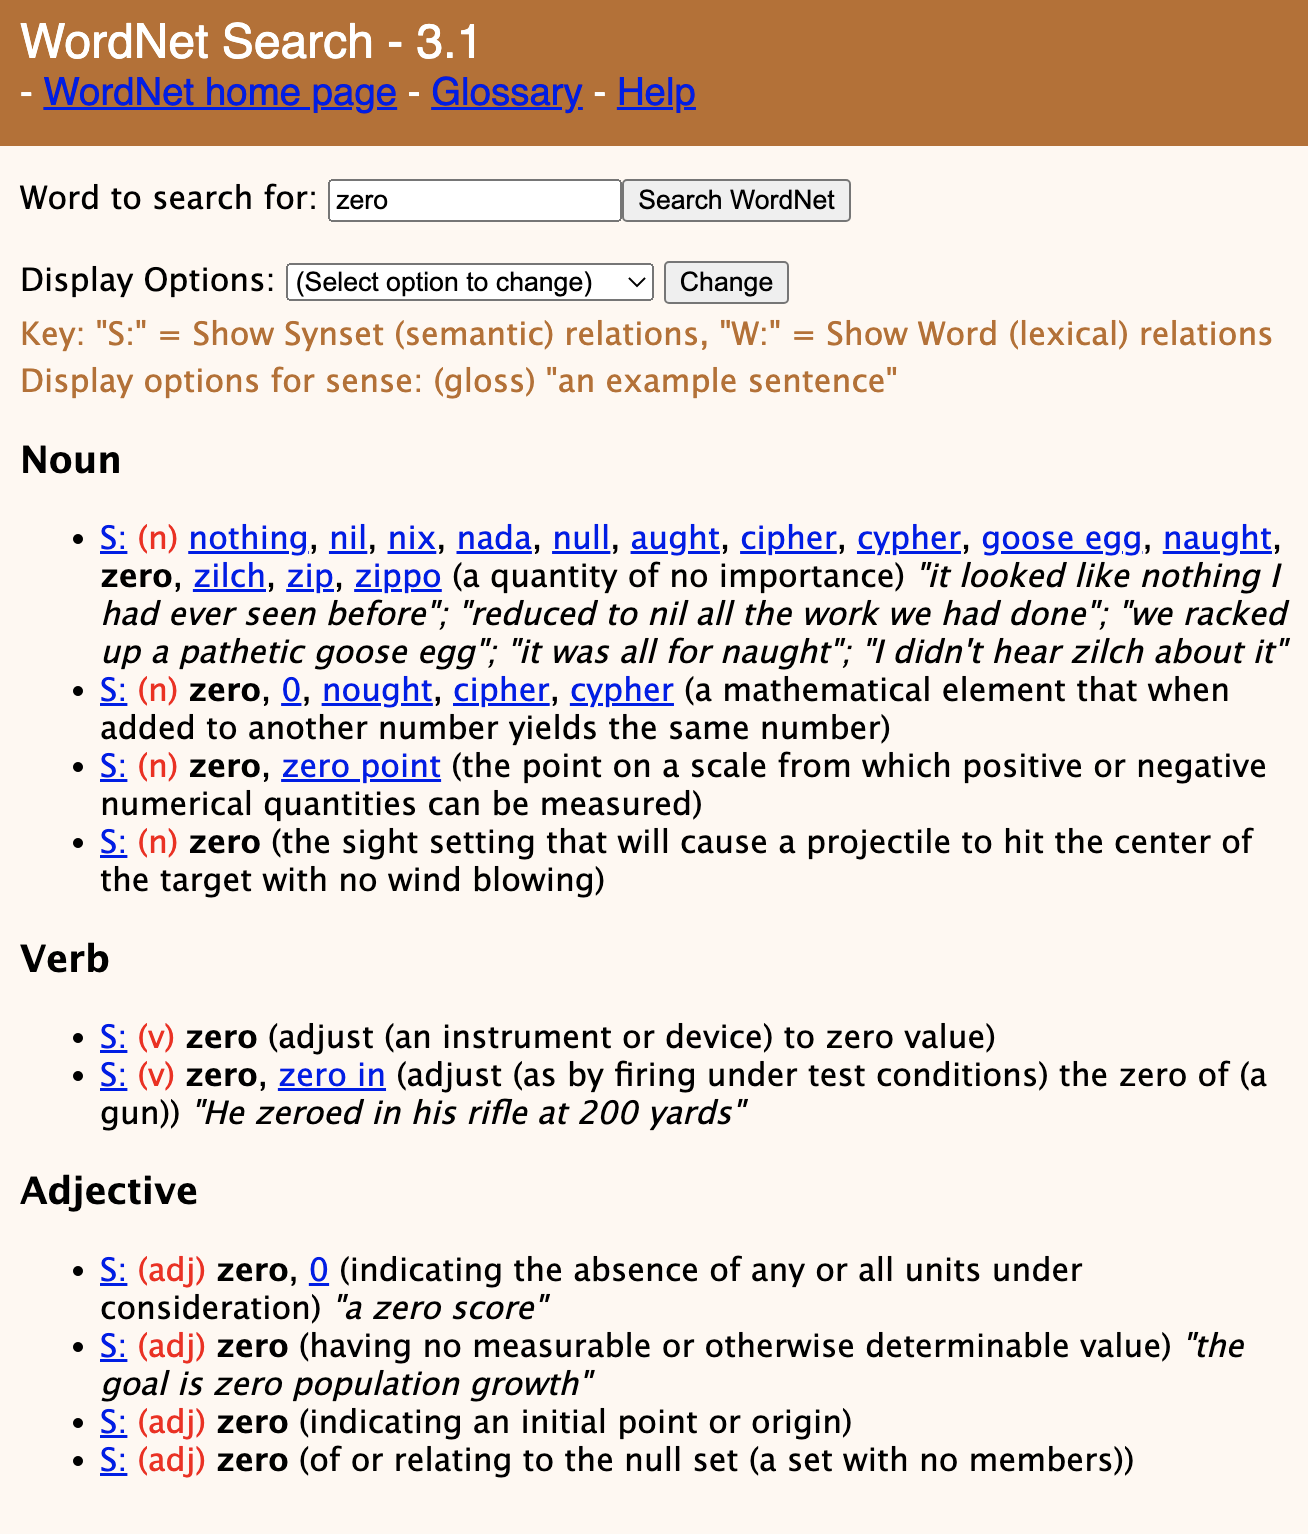